# INTRODUCTION

The dataset we would be exploring in this project is tmdb-movies which consists of 21 features and 10866 observations, during the course of the work we would be answering the following questions
 - 1. Which year had the highest number of movies released?
 - 2. Which month has the highest number of released movies?
 - 3. Which month generated more revenue for the movie industry?
 - 4. Does the number of movies released translate to more revenue?
 - 5. Does vote_count affect revenue generated from a movie?
 - 6. Which day accounts for more movies released?
 - 7. Which movie title generated the highest revenue?
 - 8. Which movie title has the longest runtime?
 - 9. Does a longer runtime indicate more revenue?
 - 10. Which movie has the highest runtime?
    

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# LOADING DATASET

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# DATA WRANGLING

In [3]:
#Checking to see the number of features and observations
df.shape

(10866, 21)

In [4]:
#Checking to see the names of all the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#Checking to see the data type of the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
#Checking to see a brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#Checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#Checking to see a summary statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#Checking to see correlation between features
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


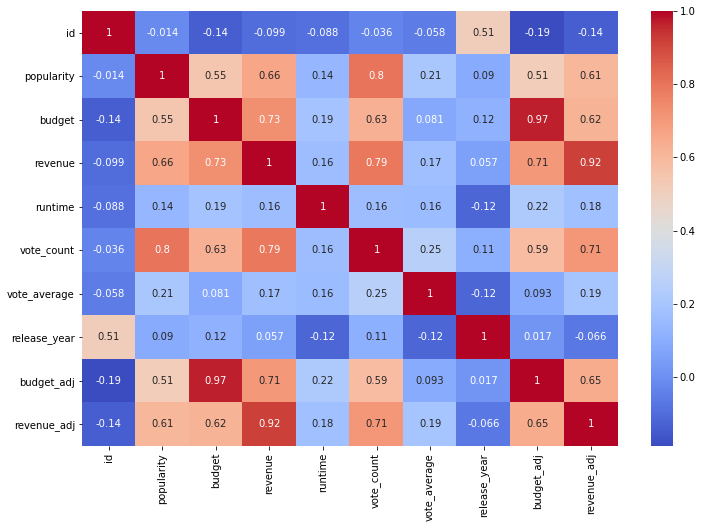

In [10]:
#Visualizing correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [11]:
#Checking the number of unique features
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

# DATA CLEANING

In [12]:
null_val = df.isnull().sum()

In [13]:
#Determining percentage null values in dataset
for item in null_val:
    print((item/10866)*100)

0.0
0.09203018590097553
0.0
0.0
0.0
0.0
0.6994294128474139
72.97993741947359
0.40493281796429226
25.989324498435483
13.740106755015645
0.03681207436039021
0.0
0.21166942757224366
9.479109147800479
0.0
0.0
0.0
0.0
0.0
0.0


In [14]:
#features with 70% null values, the entire columns will be dropped
df.drop(columns=['homepage'], inplace=True)

In [15]:
#features with null values between 5% and less than 70% will be filled with unknown
df['tagline'].fillna('Unknown',inplace=True)
df['keywords'].fillna('Unknown',inplace=True)
df['production_companies'].fillna('Unknown',inplace=True)

In [16]:
#features with less than 5% null values, the observations with the null values will be dropped since the percentage is infinitesimal
df.dropna(inplace=True)

In [17]:
#Checking to confirm if the dataset is clean
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [18]:
#Changing the data type of release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
#Confirming the change in release_date data type
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [20]:
#creating new feature release_day) from release_date
df['release_day'] = df.release_date.dt.weekday

In [21]:
#Converting the numeric variables in release_day to string
mapper = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday'}
df['release_day'] = df['release_day'].map(mapper)

In [22]:
#Confirming the change
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Tuesday
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Wednesday
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Wednesday
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Tuesday
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Wednesday


In [23]:
#creating new feature release_month) from release_date
df['release_month'] = df.release_date.dt.month

In [24]:
#Converting the numeric variables in release_day to string
mapper = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['release_month'] = df['release_month'].map(mapper)

In [25]:
#Confirming the change in release_month
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Tuesday,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Wednesday,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Wednesday,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Tuesday,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Wednesday,April


In [26]:
#Checking for duplicates in the dataset
sum(df.duplicated())

1

In [27]:
#Removing duplicate values
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

# EXPLORATORY DATA ANALYSIS

# Which year had the most number of movies released?

In [28]:
pd.DataFrame(df['release_year'].value_counts(ascending=False)[0:16])

,release_year
2014,682
2013,648
2015,617
2012,574
2011,530
2009,523
2008,486
2010,475
2007,430
2006,404


Text(0.5, 1.0, 'TOP 30 MOVIE YEARS')

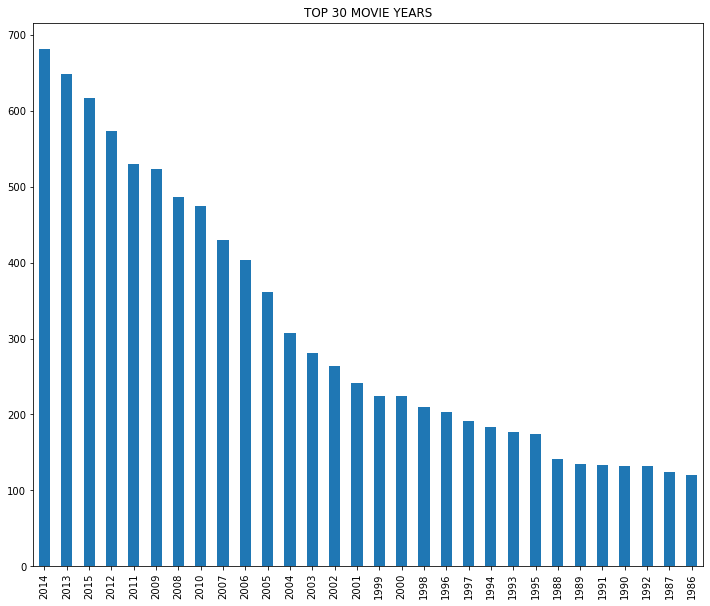

In [29]:
#Visualizing the result
plt.figure(figsize=(12,10))
df['release_year'].value_counts()[0:30].plot(kind='bar')
plt.title('TOP 30 MOVIE YEARS')

We can see that more movies were released in the year 2014 with a count of 682 movies released

# Which month had the highest number of released movies?

In [30]:
pd.DataFrame(df['release_month'].value_counts())

,release_month
September,1318
October,1137
December,974
August,906
January,888
June,822
March,813
May,807
November,798
April,791


<AxesSubplot:>

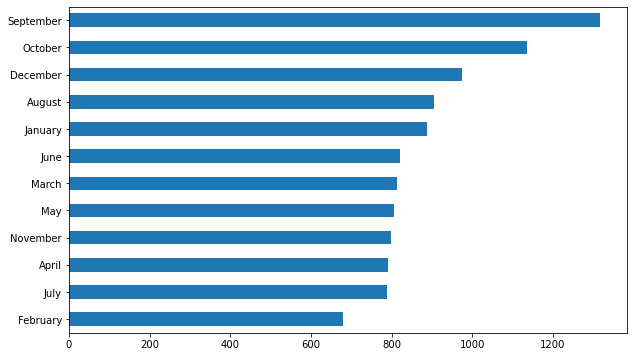

In [31]:
df['release_month'].value_counts(ascending=True).plot(kind='barh', figsize=(10,6))

The month of September had the highest number of movies released

# Which day accounts for more movie release?

In [32]:
df['release_day'].value_counts()

Friday       4225
Thursday     1674
Wednesday    1513
Tuesday      1189
Saturday      782
Monday        653
Name: release_day, dtype: int64

In [33]:
pd.DataFrame(df['release_day'].value_counts(ascending=False, normalize=True)*100)

,release_day
Friday,42.098446
Thursday,16.679952
Wednesday,15.075727
Tuesday,11.847350
Saturday,7.791949
Monday,6.506576


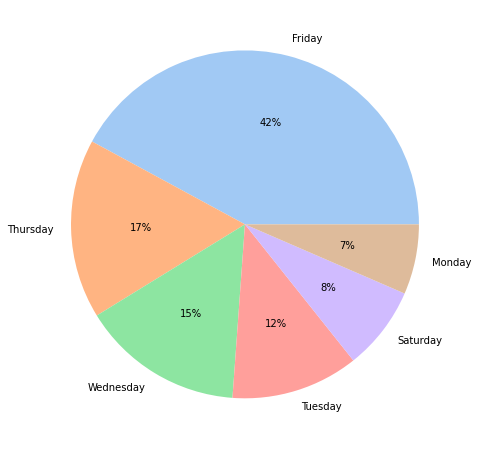

In [34]:
#Visualizing the result
release_day = pd.DataFrame(df.groupby('release_day')['release_day'].size().sort_values(ascending=False))
release_day.columns = ['Count']

labels = list(release_day.index)
#Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]

#Create pie chart
plt.figure(figsize=(8,8))
plt.pie(release_day['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

More movies were released on Friday which account for about 42%

# Which month has generated more revenue in the movie industry?

In [35]:
df.groupby('release_month')['revenue'].sum()

release_month
April        26392671428
August       25477766900
December     58211863204
February     19793785507
January      12968479332
July         45337825481
June         61660585217
March        31393443375
May          50454865815
November     45896250786
October      29353709677
September    25731466985
Name: revenue, dtype: int64

<AxesSubplot:ylabel='release_month'>

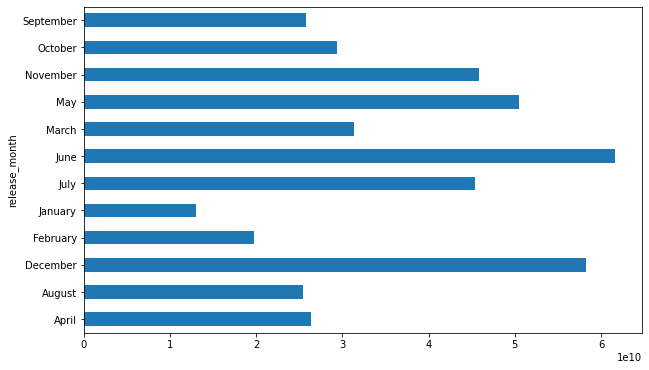

In [36]:
df.groupby('release_month')['revenue'].sum().plot(kind='barh', figsize=(10,6))

The month of June has generated more revenue for the movie industry based on the dataset

# Does the number of movies released translate to more revenue?

In [37]:
df.groupby('release_day')['revenue'].sum()

release_day
Friday       128852378314
Monday        24959065456
Saturday      13060306270
Thursday      96627259140
Tuesday       49507764714
Wednesday    105661470111
Name: revenue, dtype: int64

<AxesSubplot:xlabel='release_day'>

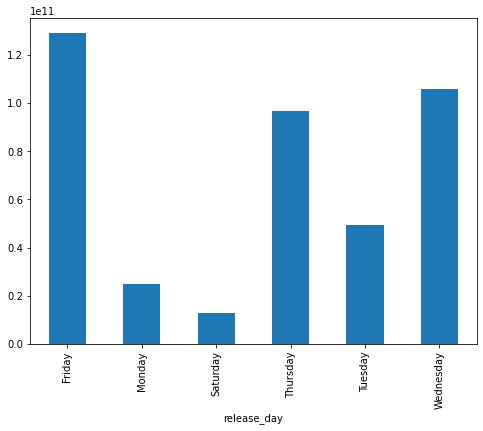

In [38]:
df.groupby('release_day')['revenue'].sum().plot(kind='bar', figsize=(8,6))

In [39]:
df.groupby('release_month')['revenue'].sum()

release_month
April        26392671428
August       25477766900
December     58211863204
February     19793785507
January      12968479332
July         45337825481
June         61660585217
March        31393443375
May          50454865815
November     45896250786
October      29353709677
September    25731466985
Name: revenue, dtype: int64

<AxesSubplot:xlabel='release_month'>

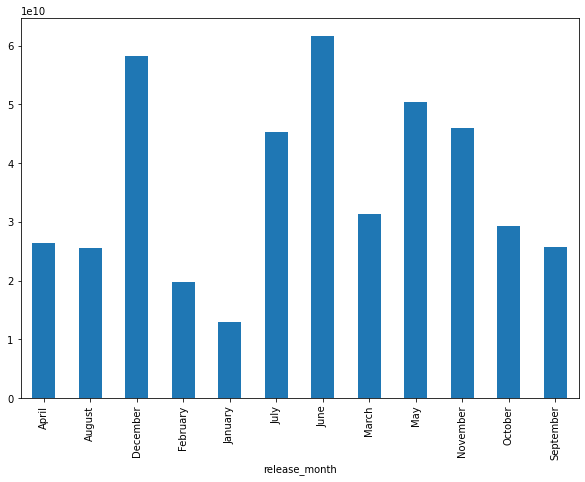

In [40]:
df.groupby('release_month')['revenue'].sum().plot(kind='bar', figsize=(10,7))

From the release_day, more movies were released on Friday which translated to more revenue, but also more movies were released in the month of September but this didn't translate to more revenue hence we can't say from the analysis if more movies released can translate to more revenue.

# Does the vote_count affect revenue

In [41]:
df['revenue'].max()

2781505847

In [42]:
df['revenue'].min()

0

In [43]:
df['vote_count'].max()

9767

In [44]:
df['vote_count'].min()

10

In [45]:
df[df['vote_count'] ==9767]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,release_month
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,Your mind is the scene of the crime.,loss of lover|dream|sleep|subconsciousness|heist,...,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,160000000.0,825500000.0,Wednesday,July


In [46]:
df[df['revenue'] == 2781505847]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,release_month
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,...,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,Thursday,December


In [47]:
df[df['vote_count'] == 10]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,release_month
240,363689,tt4229298,0.532700,0,0,The Unspoken,Jodelle Ferland|Sunny Suljic|Neal McDonough|Ma...,Sheldon Wilson,Unknown,Unknown,...,Thriller|Horror,Lighthouse Pictures|Sapphire Fire Limited,2015-10-24,10,4.1,2015,0.000000e+00,0.000000e+00,Saturday,October
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,Unknown,Unknown,...,TV Movie,Unknown,2015-11-27,10,7.6,2015,0.000000e+00,0.000000e+00,Friday,November
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,Unknown,serial killer|tied feet|tied up while barefoot,...,Crime|Horror|Thriller,Unknown,2015-09-14,10,4.7,2015,0.000000e+00,0.000000e+00,Monday,September
345,361263,tt4505830,0.342530,0,0,Jesse Stone: Lost in Paradise,Tom Selleck|William Devane|Gloria Reuben|Luke ...,Robert Harmon,Unknown,Unknown,...,Drama|TV Movie|Crime|Mystery,Sony Pictures Television,2015-10-18,10,5.6,2015,0.000000e+00,0.000000e+00,NaN,October
386,316885,tt4180576,0.291244,0,0,Bridgend,Hannah Murray|Steven Waddington|Adrian Rawlins...,Jeppe RÃ¸nde,Unknown,suicide|adolescence|based on true story|magic ...,...,Drama,Blenkov & SchÃ¸nnemann Pictures|Four Sons Pict...,2015-01-22,10,5.7,2015,0.000000e+00,0.000000e+00,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,54000,tt0077539,0.227338,6727000,0,Fedora,William Holden|Marthe Keller|Hildegard Knef|Jo...,Billy Wilder,Youth had been a habit of hers for so long tha...,hollywood|actor|down on his luck,...,Drama|Romance,SociÃ©tÃ© FranÃ§aise de Production (SFP),1978-05-30,10,4.9,1978,2.248635e+07,0.000000e+00,Tuesday,May
10808,40060,tt0077904,0.129123,0,0,The Manitou,Tony Curtis|Michael Ansara|Susan Strasberg|Ste...,William Girdler,Evil does not dieâ€¦ It waits to be re-born!,female nudity|based on novel|nudity|tarot card...,...,Horror,Melvin Simon Productions|Mid-America Pictures|...,1978-04-28,10,5.8,1978,0.000000e+00,0.000000e+00,Friday,April
10809,31428,tt0078295,0.128231,0,0,Someone's Watching Me!,Lauren Hutton|David Birney|Adrienne Barbeau|Le...,John Carpenter,Unknown,stalker|suspense|stalking|made for television,...,Horror|Mystery|TV Movie|Thriller,Warner Bros. Television,1978-11-27,10,5.7,1978,0.000000e+00,0.000000e+00,Monday,November
10812,31948,tt0077629,0.318883,0,5438927,Gray Lady Down,Charlton Heston|David Carradine|Stacy Keach|Ne...,David Greene,Trapped underwater... with time running out.,submarine|drowning|based on novel|rescue|disaster,...,Thriller|Adventure|History|Drama,Universal Pictures|The Mirisch Corporation,1978-03-10,10,6.1,1978,0.000000e+00,1.818071e+07,Friday,March


In [48]:
df[df['revenue'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,release_month
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,...,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0,Wednesday,January
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,...,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0,Thursday,May
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,Unknown,sword|magic|sorcery|necromancer|woman director,...,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0,Wednesday,June
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,...,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0,Friday,June
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,Unknown,sword|magic|sorcery|necromancer,...,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0,Saturday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Unknown,surfer|surfboard|surfing,...,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.0,Tuesday,June
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.0,Tuesday,December
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Unknown,car|trolley|stealing car,...,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.0,Friday,January
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,...,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.0,Tuesday,November


The vote_count does not affect the revenue as we can see that the minimum revenue is 0 which has quite a large number of vote_count while the minimum value for vote_count is 10 some having revenue of 0 and some having a large amount as revenue

# Which movie generated the highest amount of revenue?

In [49]:
df['revenue'].max()

2781505847

In [50]:
df[df['revenue'] == 2781505847]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,release_month
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,...,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,Thursday,December


The movie Avatar generated the highest amount of revenue with the amount 2781505847

# Does longer runtime indicate more revenue?

<Figure size 720x576 with 0 Axes>

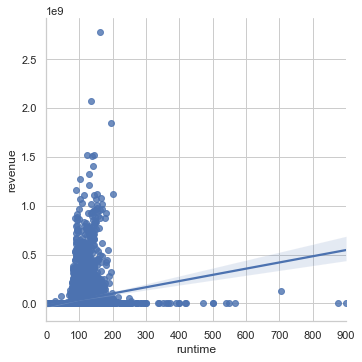

In [51]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax = sns.lmplot(x='runtime', y='revenue', data=df)

The longer the runtime doesn't indicate more revenue

# What is the longest runtime of a movie?

In [52]:
df['runtime'].max()

900

The longest runtime for a movie is 900 minutes

# Which movie has the longest runtime?

In [53]:
df[df['runtime'] == 900]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,release_month
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,Unknown,cinema|nouvelle vague|hindi cinema|cinema novo...,...,Documentary,Unknown,2011-09-03,14,9.2,2011,0.0,0.0,Saturday,September


The Story of Film:An Odyssey has the longest runtime

# SUMMARY OF FINDINGS AND CONCLUSION

- More movies were released in the year 2014.
- The month of September recorded the highest number of movies released.
- 42% of the movies were released on Friday.
- The month of June generated more revenue for the movie industry based on the dataset.
- From the release_day, more movies were released on Friday which translated to more revenue, but also more movies were released in the month of September but this didn't translate to more revenue hence we can't say from the analysis if more movies released can translate to more revenue.
- The vote_count does not affect the revenue.
- The longer the runtime doesn't indicate more revenue.
- The longest runtime for a movie is 900 minutes.
- The Story of Film:An Odyssey had the longest runtime.
- The movie Avatar generated the highest amount of revenue.  

**Conclusion**: Basic questions were just answered in this project based on the scope of the work, machine learning model can be built to better predict how more features can affect the target variable.